In [35]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [36]:
df = pd.read_csv('ToyotaCorolla - MLR.csv')

In [22]:
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [23]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [24]:
df.describe(include='all')

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
unique,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Petrol,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1264,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,10730.824513,55.947075,68533.259749,NaN,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,NaN,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,NaN,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,NaN,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,NaN,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,NaN,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000


In [25]:
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [26]:
df[df.duplicated()]

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
113,24950,8,13253,Diesel,116,0,2000,5,4,5,1320


In [27]:
df.drop_duplicates(keep = 'first')

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [28]:
#find numeric column
num_col = [i for i in df.columns if df[i].dtypes!='O']
num_col

['Price',
 'Age_08_04',
 'KM',
 'HP',
 'Automatic',
 'cc',
 'Doors',
 'Cylinders',
 'Gears',
 'Weight']

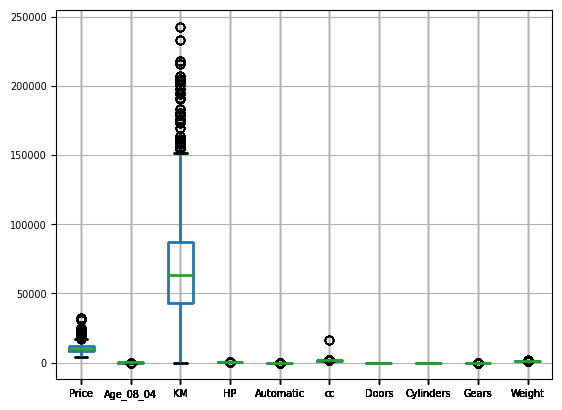

In [29]:
##find outliers of numeric column
import matplotlib.pyplot as plt
for i in num_col:
    df.boxplot(column = num_col, fontsize = 7)

plt.show()

In [30]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
IQR

C:\Users\91980\AppData\Local\Temp\ipykernel_23328\3129734637.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
C:\Users\91980\AppData\Local\Temp\ipykernel_23328\3129734637.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)


Price         3500.00
Age_08_04       26.00
KM           44020.75
HP              20.00
Automatic        0.00
cc             200.00
Doors            2.00
Cylinders        0.00
Gears            0.00
Weight          45.00
dtype: float64

In [31]:
LB = Q1 - 1.5*IQR
UB = Q3 + 1.5*IQR

In [32]:
df_cleaned = df[~((df < LB) | (df > UB)).any(axis=1)]

C:\Users\91980\AppData\Local\Temp\ipykernel_23328\22095551.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_cleaned = df[~((df < LB) | (df > UB)).any(axis=1)]


In [33]:
df_cleaned

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
9,12950,23,71138,Diesel,69,0,1900,3,4,5,1105
18,16750,24,25563,Petrol,110,0,1600,3,4,5,1065
19,16950,30,64359,Petrol,110,0,1600,3,4,5,1105
20,15950,30,67660,Petrol,110,0,1600,3,4,5,1105
22,15950,28,56349,Petrol,110,0,1600,3,4,5,1120
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [34]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
lab_enc = LabelEncoder()

In [17]:
df_cleaned['Fuel_Type']= lab_enc.fit_transform(df_cleaned[['Fuel_Type']])
#import warnings
warnings.filterwarnings('ignore')
# One-hot encoding for 'Fuel_Type'
df_encoded = pd.get_dummies(df_cleaned, columns=["Fuel_Type"], drop_first=True)

# Check the first few rows after encoding
df_encoded.head()

In [19]:
#Cylinders: Constant at 4, which means it’s not useful for modeling.
df_encoded.drop('Cylinders', axis = 1)

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
9,12950,23,71138,69,0,1900,3,5,1105,1,0
18,16750,24,25563,110,0,1600,3,5,1065,0,1
19,16950,30,64359,110,0,1600,3,5,1105,0,1
20,15950,30,67660,110,0,1600,3,5,1105,0,1
22,15950,28,56349,110,0,1600,3,5,1120,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,5,1025,0,1
1432,10845,72,19000,86,0,1300,3,5,1015,0,1
1433,8500,71,17016,86,0,1300,3,5,1015,0,1
1434,7250,70,16916,86,0,1300,3,5,1015,0,1


In [208]:
df_encoded.corr()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
Price,1.000000,-0.867168,-0.531257,0.111864,NaN,0.109523,0.178103,NaN,NaN,0.472660,0.036102,-0.029941
Age_08_04,-0.867168,1.000000,0.468104,0.011544,NaN,-0.066002,-0.102536,NaN,NaN,-0.388867,-0.138785,0.129078
KM,-0.531257,0.468104,1.000000,-0.046861,NaN,0.142423,0.010608,NaN,NaN,-0.030156,0.179169,-0.248414
HP,0.111864,0.011544,-0.046861,1.000000,NaN,0.592455,0.170784,NaN,NaN,0.308100,-0.475344,0.346793
Automatic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc,0.109523,-0.066002,0.142423,0.592455,NaN,1.000000,0.218468,NaN,NaN,0.617273,0.421467,-0.383369
Doors,0.178103,-0.102536,0.010608,0.170784,NaN,0.218468,1.000000,NaN,NaN,0.535303,0.048161,-0.051588
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Weight,0.472660,-0.388867,-0.030156,0.308100,NaN,0.617273,0.535303,NaN,NaN,1.000000,0.351783,-0.383120


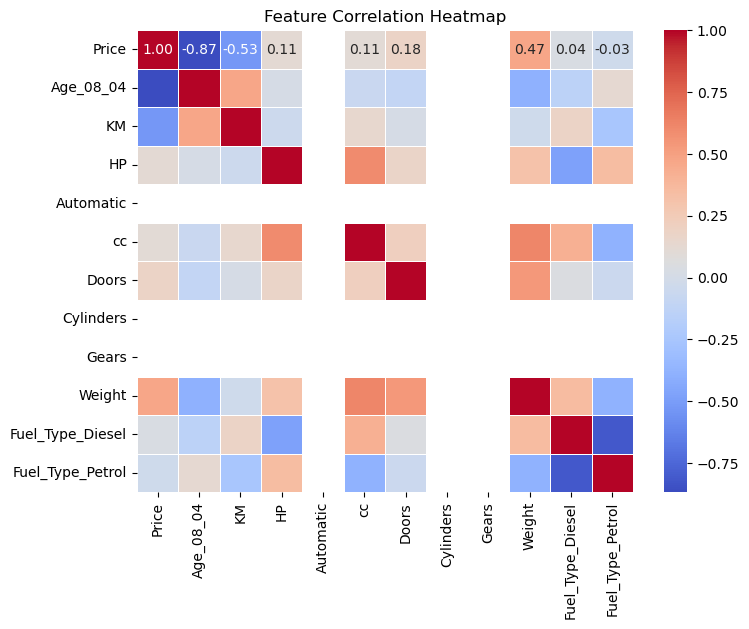

In [209]:
# Heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

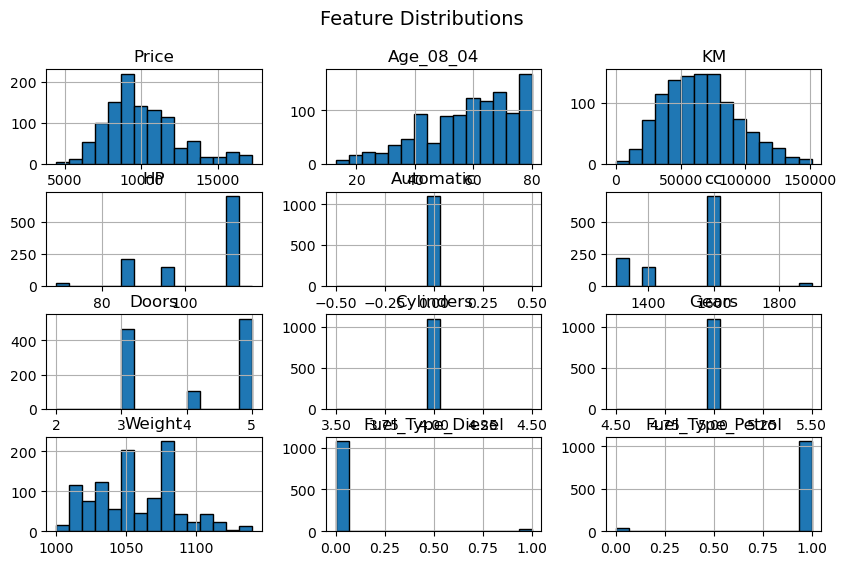

In [210]:
# Histograms of numerical variables
df_encoded.hist(figsize=(10, 6), bins=15, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()


In [211]:
from sklearn.preprocessing import PolynomialFeatures

# Select numerical features for feature engineering
numerical_features = ["Age_08_04", "KM", "HP", "cc", "Weight"]

# Create polynomial and interaction features (degree=2)
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
poly_features = poly.fit_transform(df_encoded[numerical_features])

# Create a new DataFrame with the generated features
poly_feature_names = poly.get_feature_names_out(numerical_features)
df_poly = pd.DataFrame(poly_features, columns=poly_feature_names, index=df_encoded.index)

# Concatenate with the original dataset (excluding original numerical features to avoid duplication)
df_final = pd.concat([df_encoded.drop(columns=numerical_features), df_poly], axis=1)

# Check the new dataset structure
df_final.head()


,Price,Automatic,Doors,Cylinders,Gears,Fuel_Type_Diesel,Fuel_Type_Petrol,Age_08_04,KM,HP,...,KM^2,KM HP,KM cc,KM Weight,HP^2,HP cc,HP Weight,cc^2,cc Weight,Weight^2
9,12950,0,3,4,5,1,0,23.0,71138.0,69.0,...,5.060615e+09,4908522.0,135162200.0,78607490.0,4761.0,131100.0,76245.0,3610000.0,2099500.0,1221025.0
18,16750,0,3,4,5,0,1,24.0,25563.0,110.0,...,6.534670e+08,2811930.0,40900800.0,27224595.0,12100.0,176000.0,117150.0,2560000.0,1704000.0,1134225.0
19,16950,0,3,4,5,0,1,30.0,64359.0,110.0,...,4.142081e+09,7079490.0,102974400.0,71116695.0,12100.0,176000.0,121550.0,2560000.0,1768000.0,1221025.0
20,15950,0,3,4,5,0,1,30.0,67660.0,110.0,...,4.577876e+09,7442600.0,108256000.0,74764300.0,12100.0,176000.0,121550.0,2560000.0,1768000.0,1221025.0
22,15950,0,3,4,5,0,1,28.0,56349.0,110.0,...,3.175210e+09,6198390.0,90158400.0,63110880.0,12100.0,176000.0,123200.0,2560000.0,1792000.0,1254400.0


In [212]:
df_final.shape

(1098, 27)

In [213]:
#split the data
target = df_final[['Price']]
target

,Price
9,12950
18,16750
19,16950
20,15950
22,15950
...,...
1431,7500
1432,10845
1433,8500
1434,7250


In [214]:
features = df_final.drop('Price', axis = 1)
features

,Automatic,Doors,Cylinders,Gears,Fuel_Type_Diesel,Fuel_Type_Petrol,Age_08_04,KM,HP,cc,...,KM^2,KM HP,KM cc,KM Weight,HP^2,HP cc,HP Weight,cc^2,cc Weight,Weight^2
9,0,3,4,5,1,0,23.0,71138.0,69.0,1900.0,...,5.060615e+09,4908522.0,135162200.0,78607490.0,4761.0,131100.0,76245.0,3610000.0,2099500.0,1221025.0
18,0,3,4,5,0,1,24.0,25563.0,110.0,1600.0,...,6.534670e+08,2811930.0,40900800.0,27224595.0,12100.0,176000.0,117150.0,2560000.0,1704000.0,1134225.0
19,0,3,4,5,0,1,30.0,64359.0,110.0,1600.0,...,4.142081e+09,7079490.0,102974400.0,71116695.0,12100.0,176000.0,121550.0,2560000.0,1768000.0,1221025.0
20,0,3,4,5,0,1,30.0,67660.0,110.0,1600.0,...,4.577876e+09,7442600.0,108256000.0,74764300.0,12100.0,176000.0,121550.0,2560000.0,1768000.0,1221025.0
22,0,3,4,5,0,1,28.0,56349.0,110.0,1600.0,...,3.175210e+09,6198390.0,90158400.0,63110880.0,12100.0,176000.0,123200.0,2560000.0,1792000.0,1254400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,0,3,4,5,0,1,69.0,20544.0,86.0,1300.0,...,4.220559e+08,1766784.0,26707200.0,21057600.0,7396.0,111800.0,88150.0,1690000.0,1332500.0,1050625.0
1432,0,3,4,5,0,1,72.0,19000.0,86.0,1300.0,...,3.610000e+08,1634000.0,24700000.0,19285000.0,7396.0,111800.0,87290.0,1690000.0,1319500.0,1030225.0
1433,0,3,4,5,0,1,71.0,17016.0,86.0,1300.0,...,2.895443e+08,1463376.0,22120800.0,17271240.0,7396.0,111800.0,87290.0,1690000.0,1319500.0,1030225.0
1434,0,3,4,5,0,1,70.0,16916.0,86.0,1300.0,...,2.861511e+08,1454776.0,21990800.0,17169740.0,7396.0,111800.0,87290.0,1690000.0,1319500.0,1030225.0


In [215]:
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
#X = df_final.drop(columns=["Price"])
#y = df_final["Price"]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Convert back to DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=features.columns, index=features.index)

# Check the first few rows after scaling
X_scaled_df.head()


,Automatic,Doors,Cylinders,Gears,Fuel_Type_Diesel,Fuel_Type_Petrol,Age_08_04,KM,HP,cc,...,KM^2,KM HP,KM cc,KM Weight,HP^2,HP cc,HP Weight,cc^2,cc Weight,Weight^2
9,0.0,-1.105551,0.0,0.0,6.421119,-5.210935,-2.288994,0.184006,-3.052238,2.762203,...,-0.017473,-0.631229,0.759163,0.299813,-2.774673,-0.958837,-2.515821,3.098293,2.802214,1.699636
18,0.0,-1.105551,0.0,0.0,-0.155736,0.191904,-2.224668,-1.453622,0.683134,0.581673,...,-1.084781,-1.348909,-1.328793,-1.436088,0.696684,0.723225,0.684025,0.558222,0.544939,0.276826
19,0.0,-1.105551,0.0,0.0,-0.155736,0.191904,-1.838717,-0.059581,0.683134,0.581673,...,-0.239921,0.111910,0.046181,0.046747,0.696684,0.723225,1.028221,0.558222,0.910213,1.699636
20,0.0,-1.105551,0.0,0.0,-0.155736,0.191904,-1.838717,0.059032,0.683134,0.581673,...,-0.134381,0.236205,0.163172,0.169976,0.696684,0.723225,1.028221,0.558222,0.910213,1.699636
22,0.0,-1.105551,0.0,0.0,-0.155736,0.191904,-1.967368,-0.347401,0.683134,0.581673,...,-0.474074,-0.189698,-0.237703,-0.223719,0.696684,0.723225,1.157294,0.558222,1.047190,2.246712


In [217]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled_df, target, train_size = 0.8, random_state = 10 )

In [218]:
# Define a range of alpha values for Ridge and Lasso tuning
alphas = np.logspace(-3, 3, 10)

# Perform cross-validation to find the best alpha for Ridge
ridge_cv_scores = [cross_val_score(Ridge(alpha=a), x_train, y_train, cv=5, scoring='r2').mean() for a in alphas]
best_ridge_alpha = alphas[np.argmax(ridge_cv_scores)]

# Perform cross-validation to find the best alpha for Lasso
lasso_cv_scores = [cross_val_score(Lasso(alpha=a, max_iter=5000), x_train, y_train, cv=5, scoring='r2').mean() for a in alphas]
best_lasso_alpha = alphas[np.argmax(lasso_cv_scores)]

# Train Ridge and Lasso with best alpha values
ridge_model = Ridge(alpha=best_ridge_alpha).fit(x_train, y_train)
lasso_model = Lasso(alpha=best_lasso_alpha, max_iter=5000).fit(x_train, y_train)

# Evaluate models on test set
ridge_r2 = ridge_model.score(x_test, y_test)
lasso_r2 = lasso_model.score(x_test, y_test)

best_ridge_alpha, ridge_r2, best_lasso_alpha, lasso_r2

(0.021544346900318832, 0.8105819539824556, 0.001, 0.8130286003037714)

In [ ]:
What is Normalization & Standardization and how is it helpful ? 

Normalization vs. Standardization
-> Normalization (Min-Max Scaling)
1.Scales values between 0 and 1.
2.Useful when features have different units or ranges (e.g., age vs. salary).

-> Standardization (Z-Score Scaling)
1.Transforms data to have mean = 0 and std = 1.
2.Works well for models like Lasso, Ridge, SVM, and when data has outliers.

-> Why is it helpful?
Improves model convergence in gradient-based algorithms.
Prevents features with larger values from dominating the model.
Essential for distance-based models (e.g., KNN, PCA, SVM).

In [ ]:
What techniques can be used to address multicollinearity in multiple linear regression?
Techniques to Address Multicollinearity in Multiple Linear Regression

1. Variance Inflation Factor (VIF)
Identify highly correlated predictors (VIF>5 indicates multicollinearity).

2. Remove Highly Correlated Features
Drop one of the correlated variables to reduce redundancy.

3. Principal Component Analysis (PCA)
Transform correlated features into uncorrelated principal components.

4. Ridge Regression (L2 Regularization)
Reduces the impact of collinear variables by shrinking coefficients.

5. Lasso Regression (L1 Regularization)
Performs feature selection by setting some coefficients to zero.

6. Feature Engineering
Combine correlated features into meaningful interaction terms or ratios.
